# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df


market_id        created_at actual_delivery_time  \
0               1  06-02-2015 22:24     06-02-2015 23:11   
1               2  10-02-2015 21:49     10-02-2015 22:33   
2               2  16-02-2015 00:11     16-02-2015 01:06   
3               1  12-02-2015 03:36     12-02-2015 04:35   
4               1  27-01-2015 02:12     27-01-2015 02:58   
...           ...               ...                  ...   
175772          1  17-02-2015 00:19     17-02-2015 01:02   
175773          1  13-02-2015 00:01     13-02-2015 01:03   
175774          1  24-01-2015 04:46     24-01-2015 05:32   
175775          1  01-02-2015 18:18     01-02-2015 19:03   
175776          1  08-02-2015 19:24     08-02-2015 20:01   

        store_primary_category  order_protocol  total_items  subtotal  \
0                            4               1            4      3441   
1                           46               2            1      1900   
2                           36               3            4      4771   
3                           38               1            1      1525   
4                           38               1            2      3620   
...                        ...             ...          ...       ...   
175772                      28               4            3      1389   
175773                      28               4            6      3010   
175774                      28               4            5      1836   
175775                      58               1            1      1175   
175776                      58               1            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        2            1425            2195   
...                    ...             ...             ...   
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                          33                  14                        21   
1                           1                   2                         2   
2                           8                   6                        18   
3                           5                   6                         8   
4                           5                   5                         7   
...                       ...                 ...                       ...   
175772                     17                  17                        23   
175773                     12                  11                        14   
175774                     39                  41                        40   
175775                      7                   7                        12   
175776                     20                  20                        23   

        distance  
0          34.44  
1          27.60  
2          11.56  
3          31.80  
4           8.20  
...          ...  
175772     13.24  
175773     36.60  
175774     31.80  
175775     15.36  
175776      5.36  

[175777 rows x 14 columns]

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'], format='%d-%m-%Y %H:%M')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], format='%d-%m-%Y %H:%M')
# Calculate the delivery duration in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60


print(df[['created_at', 'actual_delivery_time']])


                created_at actual_delivery_time
0      2015-02-06 22:24:00  2015-02-06 23:11:00
1      2015-02-10 21:49:00  2015-02-10 22:33:00
2      2015-02-16 00:11:00  2015-02-16 01:06:00
3      2015-02-12 03:36:00  2015-02-12 04:35:00
4      2015-01-27 02:12:00  2015-01-27 02:58:00
...                    ...                  ...
175772 2015-02-17 00:19:00  2015-02-17 01:02:00
175773 2015-02-13 00:01:00  2015-02-13 01:03:00
175774 2015-01-24 04:46:00  2015-01-24 05:32:00
175775 2015-02-01 18:18:00  2015-02-01 19:03:00
175776 2015-02-08 19:24:00  2015-02-08 20:01:00

[175777 rows x 2 columns]


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type
for col in df.columns:
    num_unique = df[col].nunique()
    if num_unique < 20 and df[col].dtype not in ['datetime64[ns]', 'float64', 'int64']:
        df[col] = df[col].astype('category')
    elif col in ['market_id', 'store_primary_category', 'order_protocol']:
        df[col] = df[col].astype('category')


print(df.dtypes)


market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers                int64
total_busy_dashers                   int64
total_outstanding_orders             int64
distance                           float64
delivery_time_minutes              float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

print(df[['created_at', 'actual_delivery_time', 'delivery_time_minutes']].head())

           created_at actual_delivery_time  delivery_time_minutes
0 2015-02-06 22:24:00  2015-02-06 23:11:00                   47.0
1 2015-02-10 21:49:00  2015-02-10 22:33:00                   44.0
2 2015-02-16 00:11:00  2015-02-16 01:06:00                   55.0
3 2015-02-12 03:36:00  2015-02-12 04:35:00                   59.0
4 2015-01-27 02:12:00  2015-01-27 02:58:00                   46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour_of_day'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek  # Monday is 0 and Sunday is 6

# Create a categorical feature 'isWeekend'

df['isWeekend']=df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

print(df[['created_at', 'hour_of_day', 'day_of_week', 'isWeekend']])

                created_at  hour_of_day  day_of_week  isWeekend
0      2015-02-06 22:24:00           22            4          0
1      2015-02-10 21:49:00           21            1          0
2      2015-02-16 00:11:00            0            0          0
3      2015-02-12 03:36:00            3            3          0
4      2015-01-27 02:12:00            2            1          0
...                    ...          ...          ...        ...
175772 2015-02-17 00:19:00            0            1          0
175773 2015-02-13 00:01:00            0            4          0
175774 2015-01-24 04:46:00            4            5          1
175775 2015-02-01 18:18:00           18            6          1
175776 2015-02-08 19:24:00           19            6          1

[175777 rows x 4 columns]


In [ ]:
# Drop unnecessary columns
df_dropped=df.drop(columns=['created_at', 'actual_delivery_time'])
df_dropped

market_id store_primary_category order_protocol  total_items  subtotal  \
0              1                      4              1            4      3441   
1              2                     46              2            1      1900   
2              2                     36              3            4      4771   
3              1                     38              1            1      1525   
4              1                     38              1            2      3620   
...          ...                    ...            ...          ...       ...   
175772         1                     28              4            3      1389   
175773         1                     28              4            6      3010   
175774         1                     28              4            5      1836   
175775         1                     58              1            1      1175   
175776         1                     58              1            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        2            1425            2195   
...                    ...             ...             ...   
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                          33                  14                        21   
1                           1                   2                         2   
2                           8                   6                        18   
3                           5                   6                         8   
4                           5                   5                         7   
...                       ...                 ...                       ...   
175772                     17                  17                        23   
175773                     12                  11                        14   
175774                     39                  41                        40   
175775                      7                   7                        12   
175776                     20                  20                        23   

        distance  delivery_time_minutes  hour_of_day  day_of_week  isWeekend  
0          34.44                   47.0           22            4          0  
1          27.60                   44.0           21            1          0  
2          11.56                   55.0            0            0          0  
3          31.80                   59.0            3            3          0  
4           8.20                   46.0            2            1          0  
...          ...                    ...          ...          ...        ...  
175772     13.24                   43.0            0            1          0  
175773     36.60                   62.0            0            4          0  
175774     31.80                   46.0            4            5          1  
175775     15.36                   45.0           18            6          1  
175776      5.36                   37.0           19            6          1  

[175777 rows x 16 columns]

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [ ]:
# Define target variable (y) and features (X)

y_train= df['delivery_time_minutes']
x_train= df[['market_id','store_primary_category','order_protocol','total_items','subtotal','num_distinct_items','min_item_price',	'max_item_price',	'total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']]

print(x_train, y_train)

       market_id store_primary_category order_protocol  total_items  subtotal  \
0              1                      4              1            4      3441   
1              2                     46              2            1      1900   
2              2                     36              3            4      4771   
3              1                     38              1            1      1525   
4              1                     38              1            2      3620   
...          ...                    ...            ...          ...       ...   
175772         1                     28              4            3      1389   
175773         1                     28              4            6      3010   
175774         1                     28              4            5      1836   
175775         1                     58              1            1      1175   
175776         1                     58              1            4      2605   

        num_distinct_items 

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(x_train)
print(x_test)
print(y_train)
print(y_test)


       market_id store_primary_category order_protocol  total_items  subtotal  \
154176         4                     72              5            1      1320   
106202         2                     46              5            2      3057   
82913          3                      4              1            1       875   
161607         3                      4              5            1      1531   
158161         3                     20              1            2      1320   
...          ...                    ...            ...          ...       ...   
57284          2                     20              1            3      3315   
11924          3                     13              2            3       764   
93759          3                     28              4           16       856   
56572          2                     13              5            4      2620   
7482           2                     13              5            4      2564   

        num_distinct_items 

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
df.describe()



created_at           actual_delivery_time  \
count                         175777                         175777   
mean   2015-02-04 19:57:20.410520320  2015-02-04 20:43:32.591294720   
min              2015-01-21 15:22:00            2015-01-21 16:07:00   
25%              2015-01-29 01:31:00            2015-01-29 02:16:00   
50%              2015-02-05 02:41:00            2015-02-05 03:34:00   
75%              2015-02-12 01:04:00            2015-02-12 01:48:00   
max              2015-02-18 06:00:00            2015-02-18 06:51:00   
std                              NaN                            NaN   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.674055    1828.554893            1.625681      519.882924   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.828571              34.544724           32.168505   

       total_outstanding_orders       distance  delivery_time_minutes  \
count             175777.000000  175777.000000          175777.000000   
mean                  58.230115      21.843090              46.203013   
min                   -6.000000       0.000000              32.000000   
25%                   17.000000      15.360000              39.000000   
50%                   41.000000      21.760000              45.000000   
75%                   85.000000      28.120000              52.000000   
max                  285.000000      83.520000             110.000000   
std                   52.731043       8.748712               9.327424   

         hour_of_day    day_of_week      isWeekend  
count  175777.000000  175777.000000  175777.000000  
mean        8.473441       3.222293       0.345614  
min         0.000000       0.000000       0.000000  
25%         2.000000       1.000000       0.000000  
50%         3.000000       3.000000       0.000000  
75%        19.000000       5.000000       1.000000  
max        23.000000       6.000000       1.000000  
std         8.676809       2.043874       0.475569

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()

print("numerical_colum",numerical_cols)
print("category_colum",categorical_cols)

numerical_colum ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_time_minutes', 'hour_of_day', 'day_of_week', 'isWeekend']
category_colum ['market_id', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

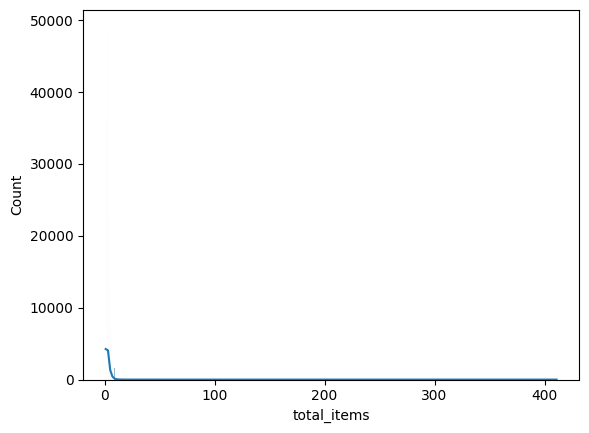

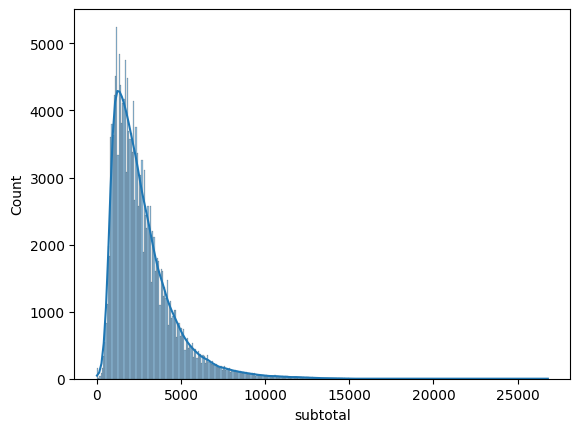

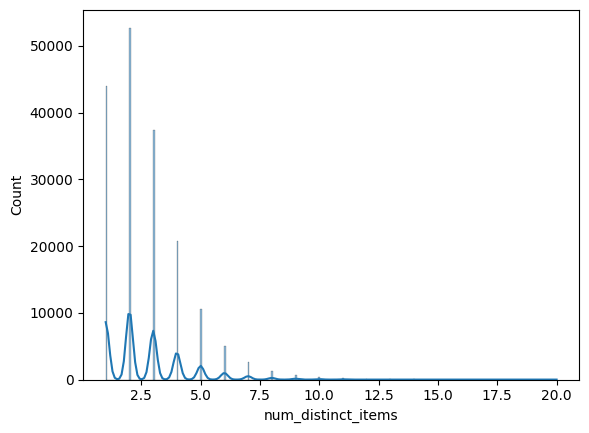

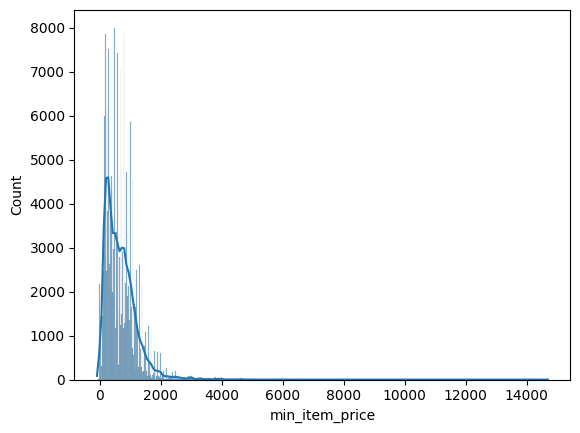

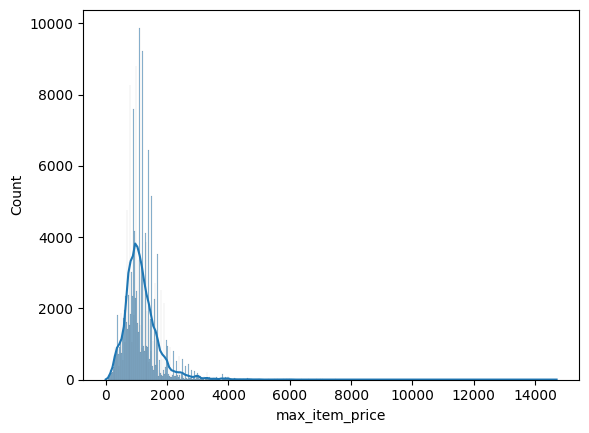

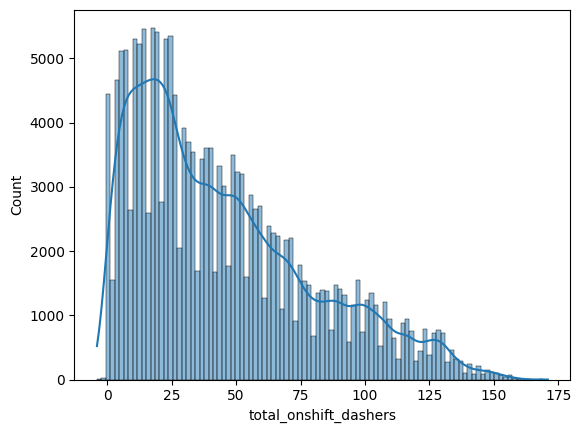

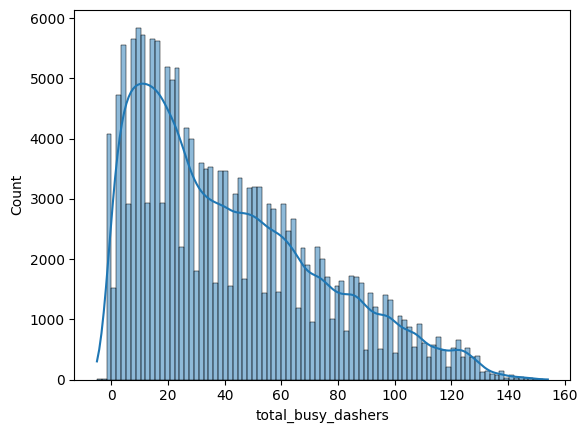

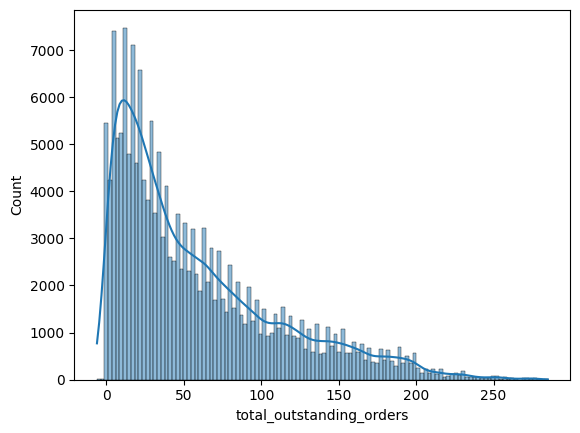

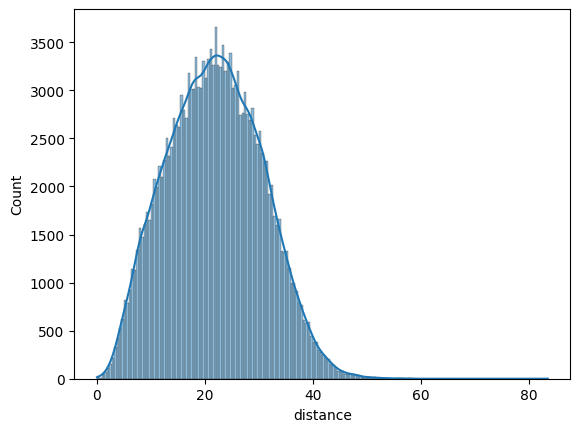

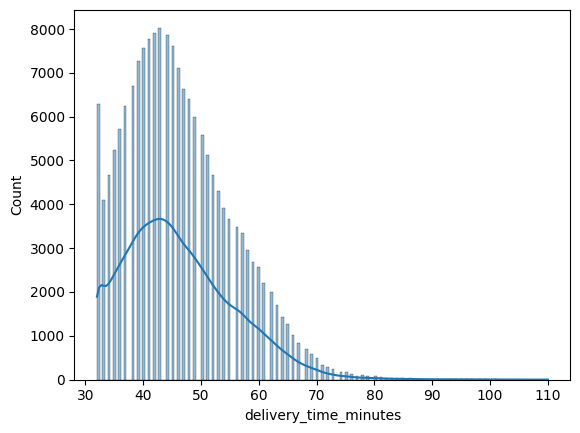

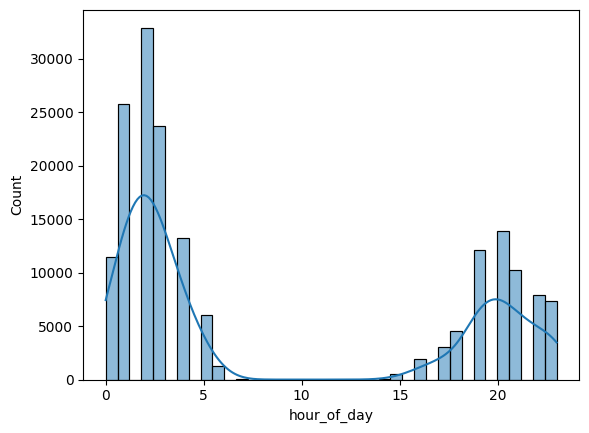

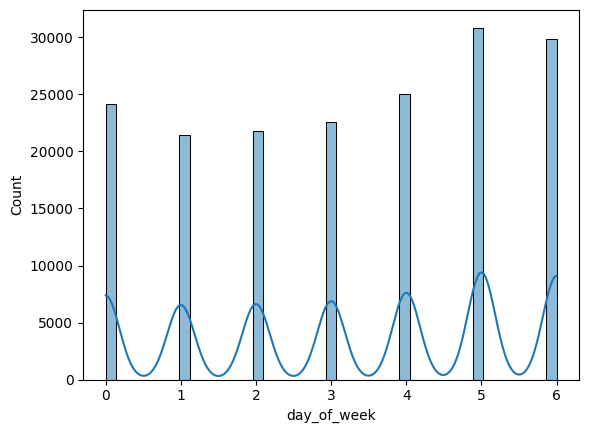

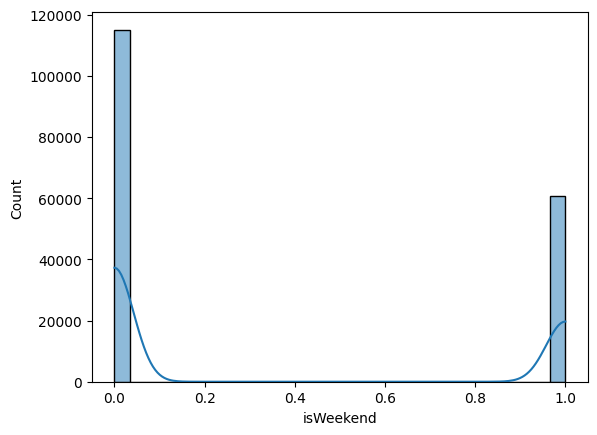

In [ ]:
# Plot distributions for all numerical columns
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include="number").columns:
  sns.histplot(df[i], kde=True)
  plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

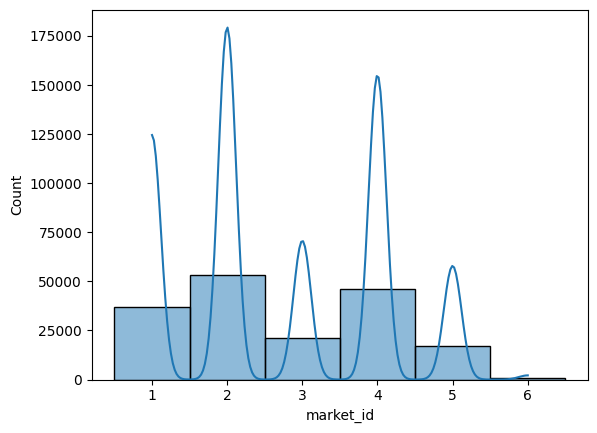

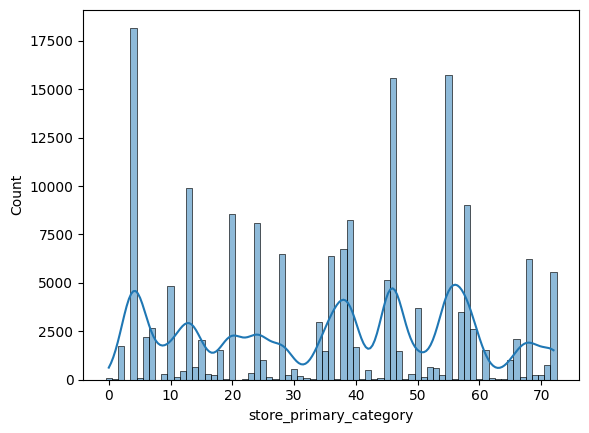

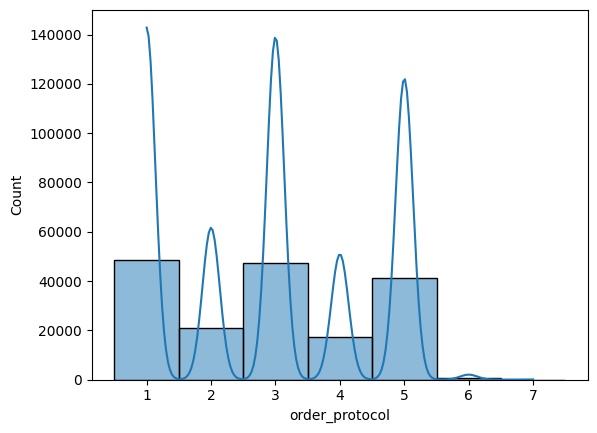

In [ ]:
# Distribution of categorical columns
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include="category").columns:
  sns.histplot(df[i], kde=True)
  plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

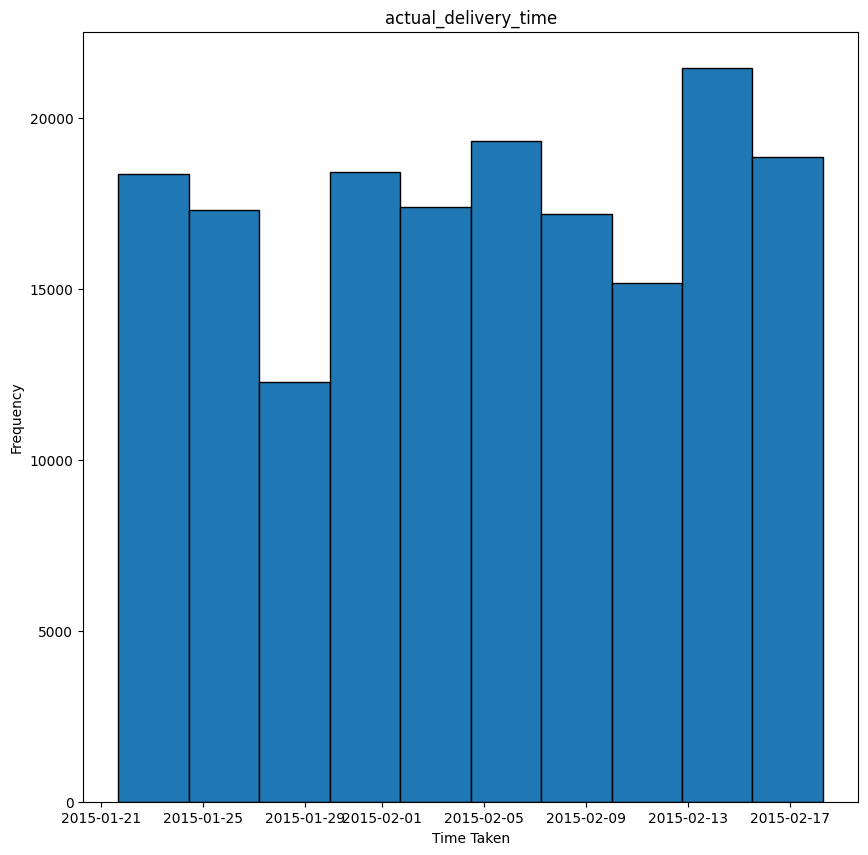

In [ ]:
# Distribution of time_taken

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.hist(df['actual_delivery_time'],  edgecolor='black')
plt.xlabel('Time Taken')
plt.ylabel('Frequency')
plt.title('actual_delivery_time')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

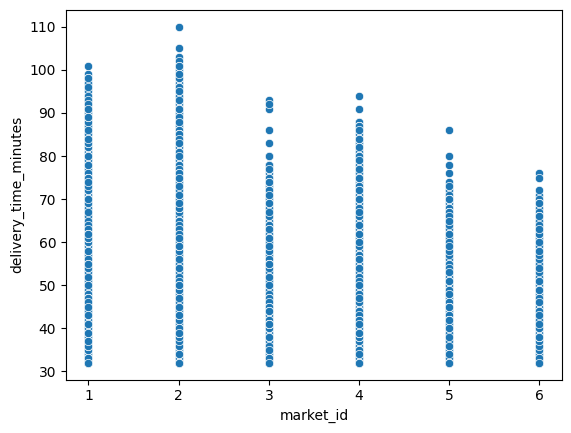

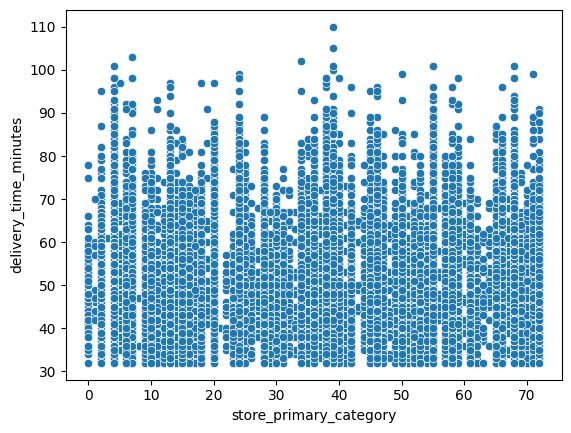

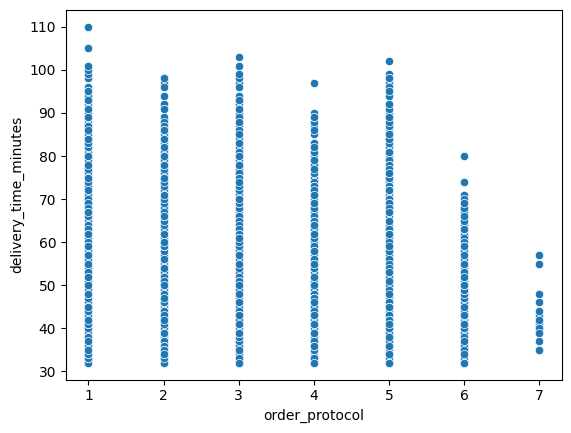

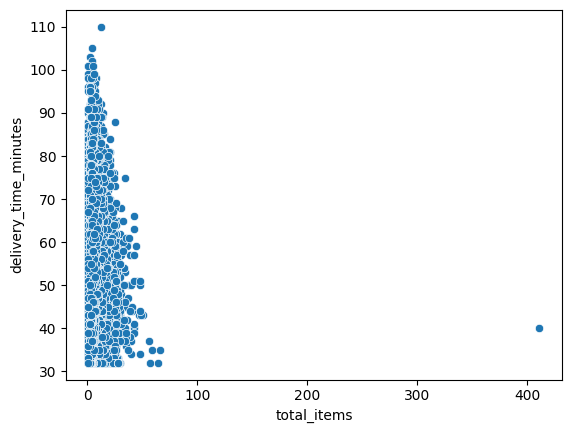

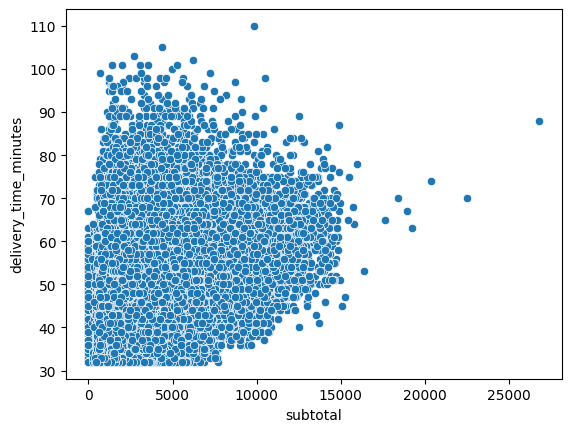

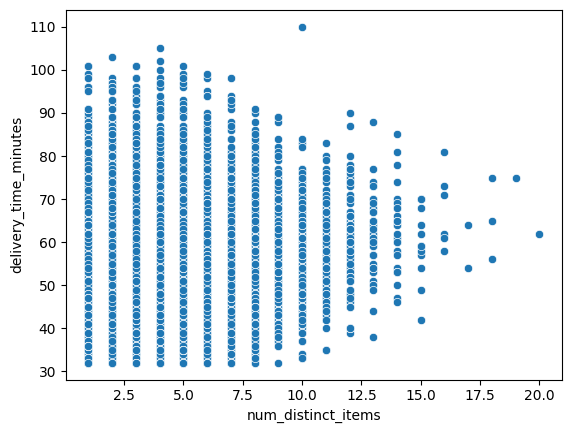

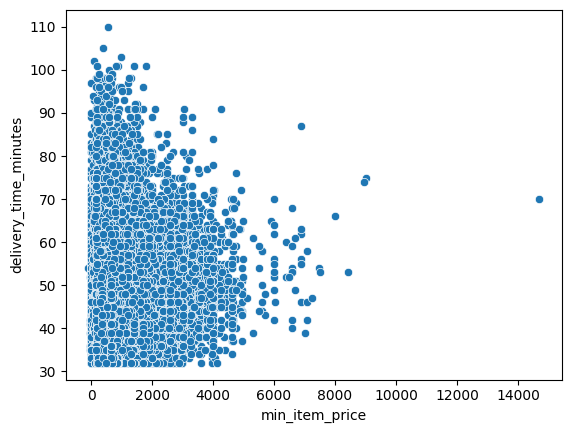

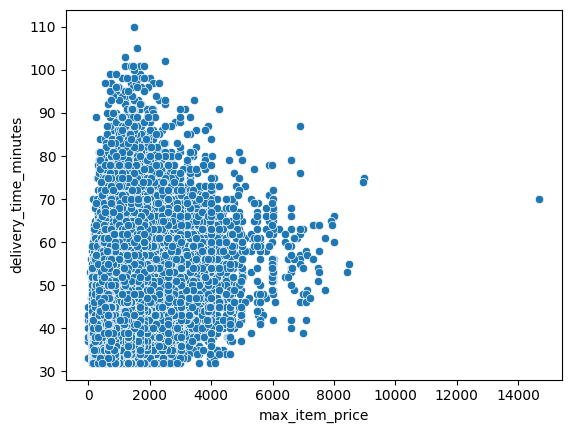

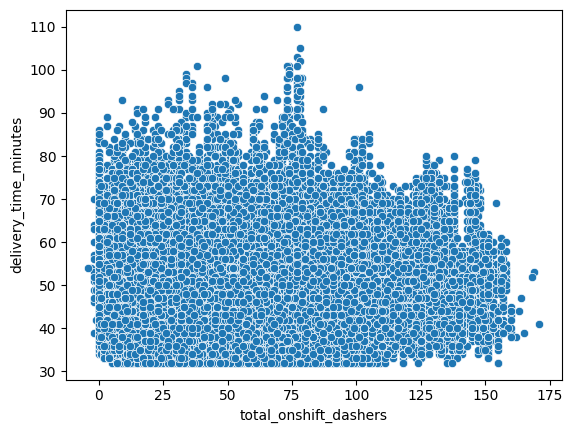

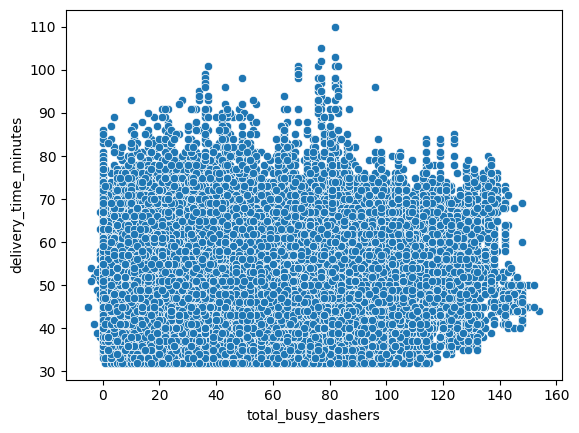

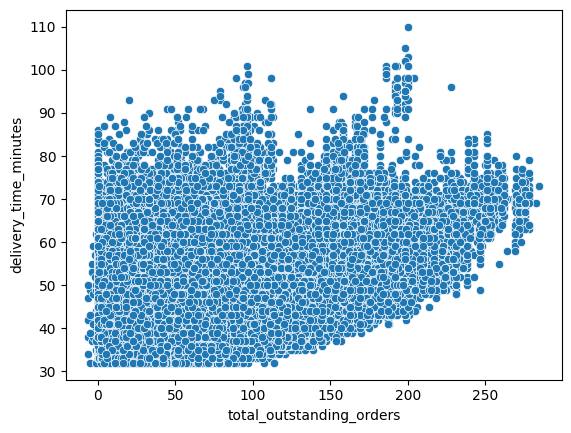

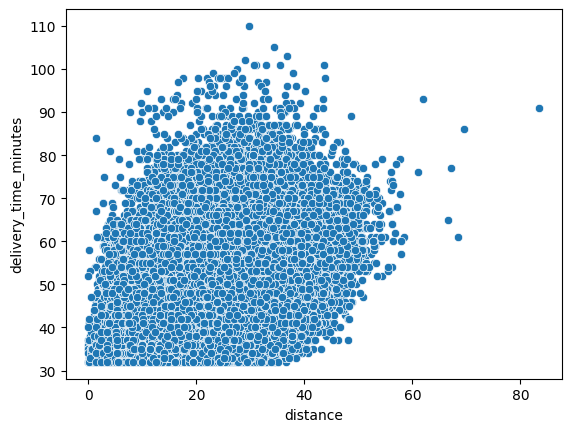

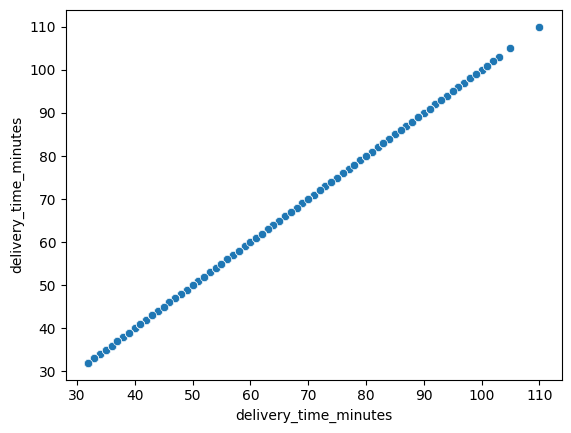

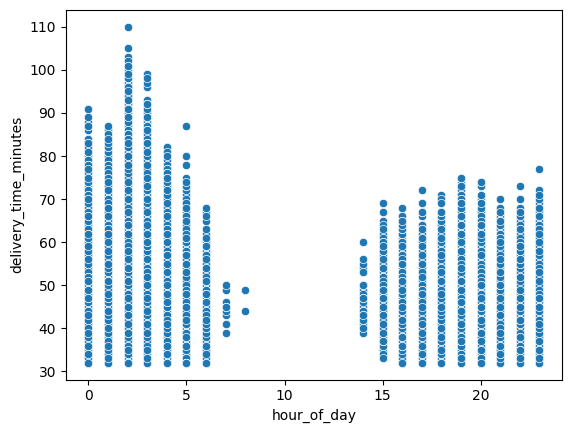

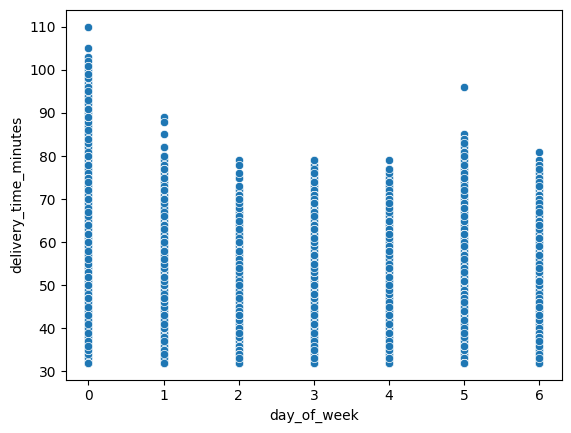

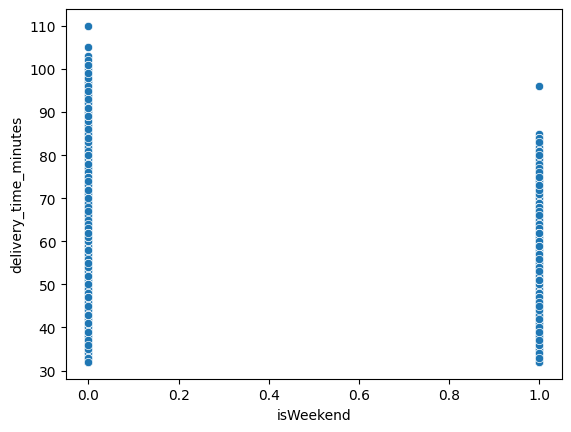

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.select_dtypes(include=["number", "category"]).columns:
  sns.scatterplot(x=df[i], y=df['delivery_time_minutes'])
  plt.show()


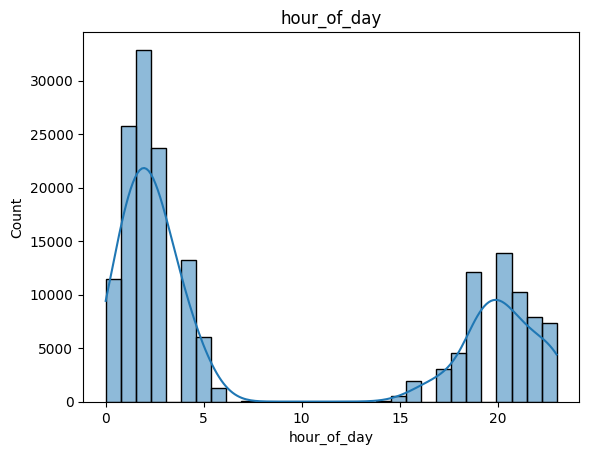

In [ ]:
# Show the distribution of time_taken for different hours
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['hour_of_day'], bins=30,kde=True)
plt.title('hour_of_day')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [ ]:
# Plot the heatmap of the correlation matrix

h=df.select_dtypes(include="number").corr()
h

total_items  subtotal  num_distinct_items  \
total_items                  1.000000  0.554951            0.758339   
subtotal                     0.554951  1.000000            0.680842   
num_distinct_items           0.758339  0.680842            1.000000   
min_item_price              -0.389471  0.038778           -0.446503   
max_item_price              -0.053749  0.509787            0.047113   
total_onshift_dashers        0.032087  0.131239            0.065793   
total_busy_dashers           0.029084  0.126150            0.060508   
total_outstanding_orders     0.034818  0.130481            0.067730   
distance                     0.006589  0.038156            0.024535   
delivery_time_minutes        0.224856  0.413267            0.312055   
hour_of_day                 -0.070399 -0.190739           -0.118982   
day_of_week                  0.022422  0.032832            0.030547   
isWeekend                    0.029398  0.048313            0.044081   

                          min_item_price  max_item_price  \
total_items                    -0.389471       -0.053749   
subtotal                        0.038778        0.509787   
num_distinct_items             -0.446503        0.047113   
min_item_price                  1.000000        0.541522   
max_item_price                  0.541522        1.000000   
total_onshift_dashers           0.042655        0.133786   
total_busy_dashers              0.044311        0.131835   
total_outstanding_orders        0.041478        0.131364   
distance                        0.004464        0.029366   
delivery_time_minutes           0.022753        0.255167   
hour_of_day                    -0.051824       -0.189802   
day_of_week                    -0.001013        0.030017   
isWeekend                       0.000760        0.045523   

                          total_onshift_dashers  total_busy_dashers  \
total_items                            0.032087            0.029084   
subtotal                               0.131239            0.126150   
num_distinct_items                     0.065793            0.060508   
min_item_price                         0.042655            0.044311   
max_item_price                         0.133786            0.131835   
total_onshift_dashers                  1.000000            0.943725   
total_busy_dashers                     0.943725            1.000000   
total_outstanding_orders               0.936121            0.932826   
distance                               0.045269            0.043948   
delivery_time_minutes                  0.171015            0.206045   
hour_of_day                           -0.375090           -0.350589   
day_of_week                            0.103070            0.086077   
isWeekend                              0.090487            0.109332   

                          total_outstanding_orders  distance  \
total_items                               0.034818  0.006589   
subtotal                                  0.130481  0.038156   
num_distinct_items                        0.067730  0.024535   
min_item_price                            0.041478  0.004464   
max_item_price                            0.131364  0.029366   
total_onshift_dashers                     0.936121  0.045269   
total_busy_dashers                        0.932826  0.043948   
total_outstanding_orders                  1.000000  0.039147   
distance                                  0.039147  1.000000   
delivery_time_minutes                     0.384999  0.460173   
hour_of_day                              -0.362577 -0.025225   
day_of_week                               0.087496  0.009683   
isWeekend                                 0.115899  0.009077   

                          delivery_time_minutes  hour_of_day  day_of_week  \
total_items                            0.224856    -0.070399     0.022422   
subtotal                               0.413267    -0.190739     0.032832   
num_distinct_items                     0.312055    -0.118982     0.

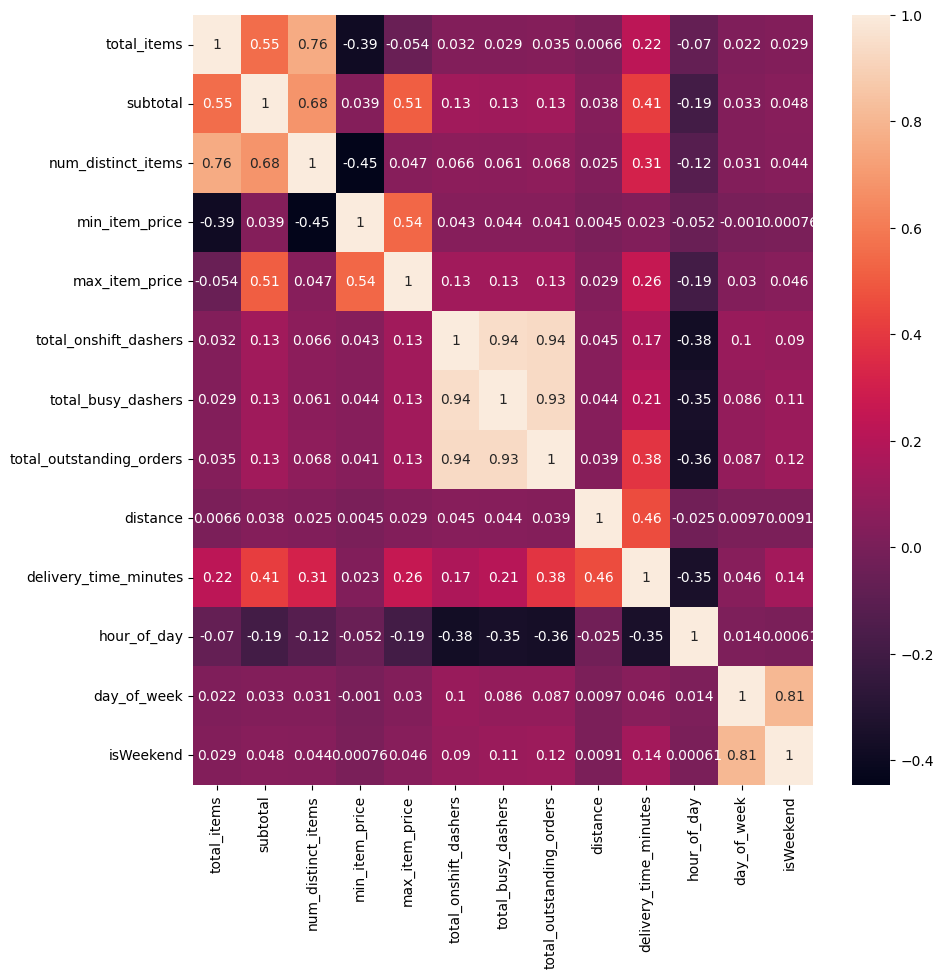

In [ ]:
#plot the heatmap of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(h, annot=True)

plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
# Select numeric columns (correlation only works on numbers)
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Get correlations with the target column
target_corr = corr_matrix['delivery_time_minutes']

# Take absolute value and sort
abs_corr = target_corr.abs().sort_values()

# Exclude the target column itself
abs_corr = abs_corr.drop('delivery_time_minutes')

# Display the weakest correlated columns (example: 5 weakest)
weakest_columns = abs_corr.head(5)
print("Weakest correlated columns:\n", weakest_columns)



Weakest correlated columns:
 min_item_price           0.022753
day_of_week              0.045878
isWeekend                0.136414
total_onshift_dashers    0.171015
total_busy_dashers       0.206045
Name: delivery_time_minutes, dtype: float64


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

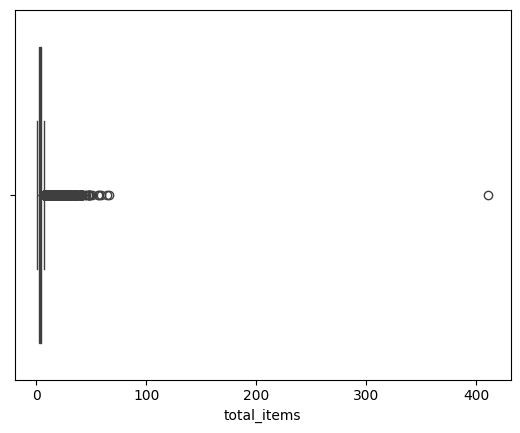

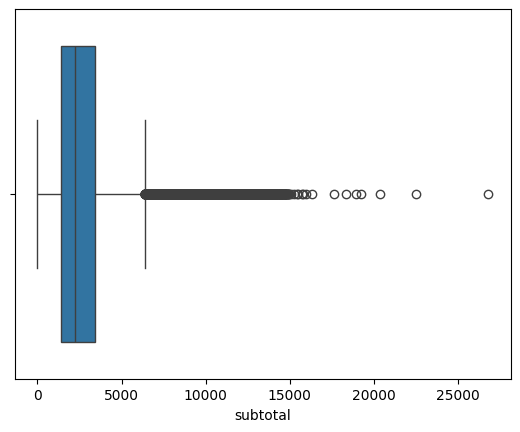

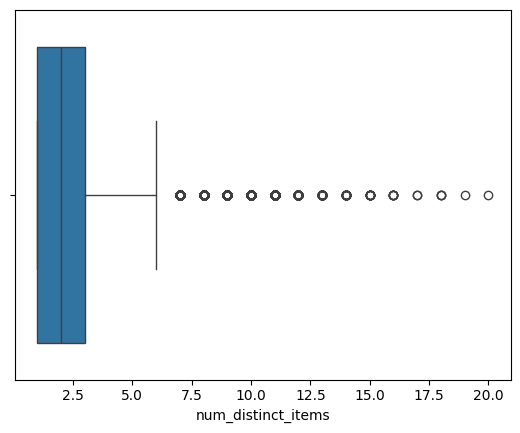

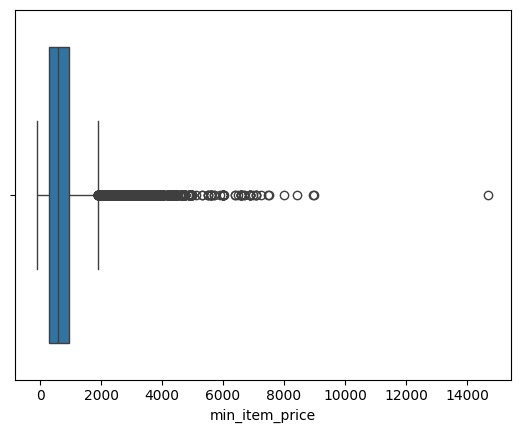

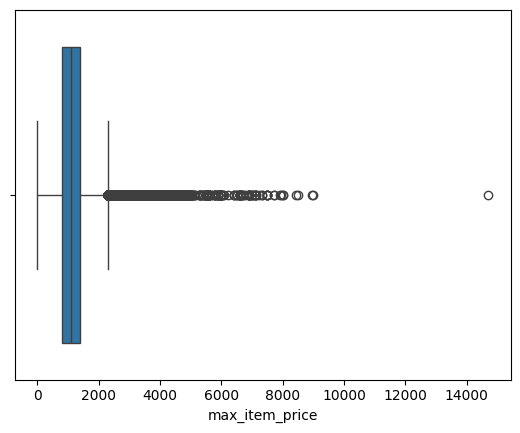

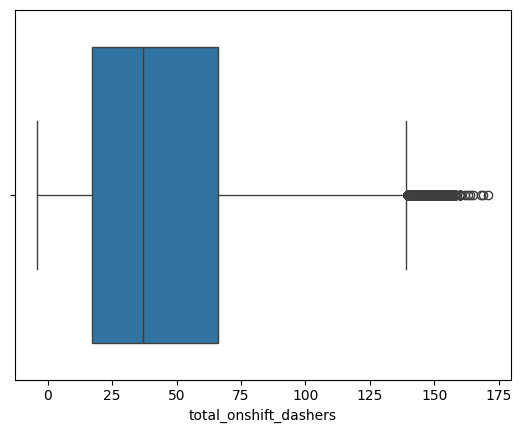

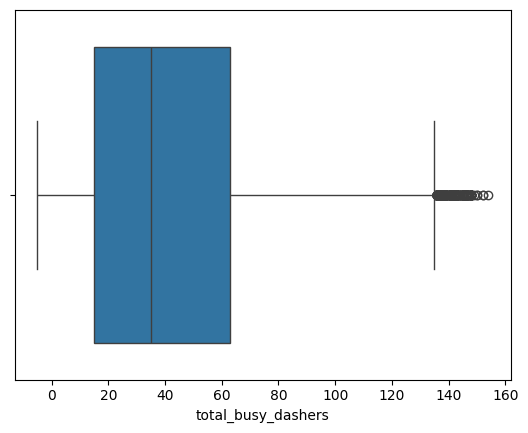

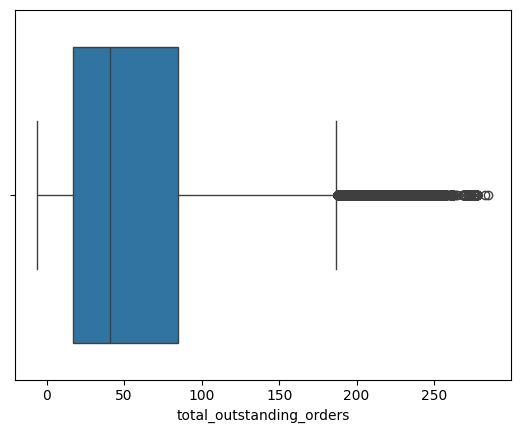

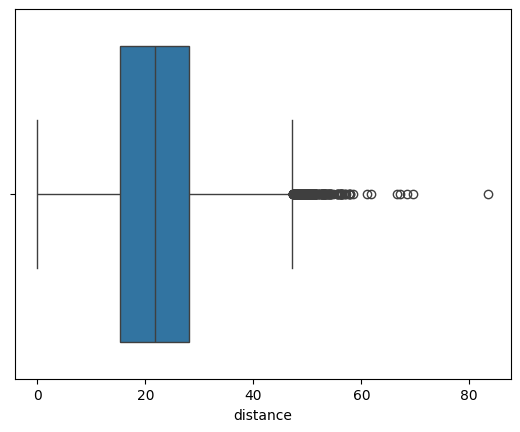

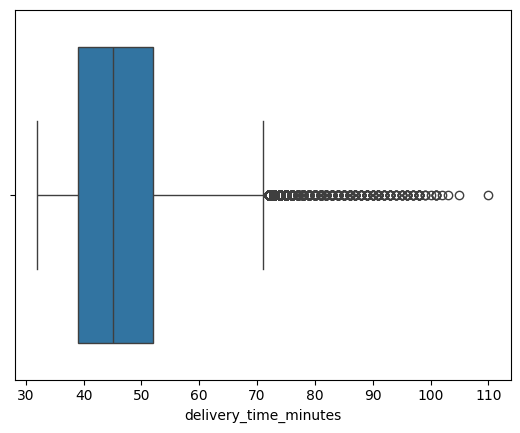

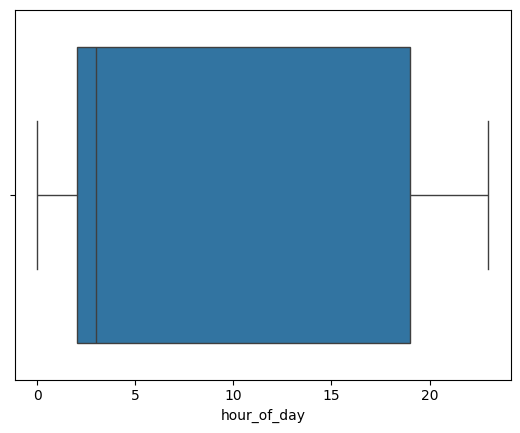

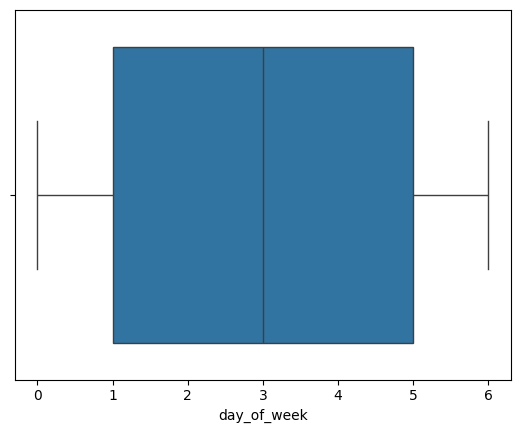

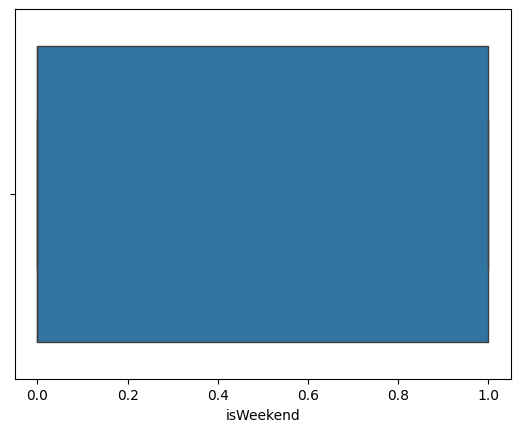

In [ ]:
# Boxplot for time_taken
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

for col in numerical_cols:
    Q1 = df[col].quantile(0.20)
    Q3 = df[col].quantile(0.80)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape after removing outliers:", df.shape)


Shape after removing outliers: (160712, 18)


In [ ]:
def wiskers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lw=Q1 - 1.5*IQR
    uw=Q3 + 1.5*IQR
    return lw,uw

In [ ]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time_minutes',
       'hour_of_day', 'day_of_week', 'isWeekend'],
      dtype='object')

In [ ]:
wiskers=(df, 'market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time_minutes',
       'hour_of_day', 'day_of_week', 'isWeekend')
wiskers

(       market_id          created_at actual_delivery_time  \
 0              1 2015-02-06 22:24:00  2015-02-06 23:11:00   
 1              2 2015-02-10 21:49:00  2015-02-10 22:33:00   
 2              2 2015-02-16 00:11:00  2015-02-16 01:06:00   
 3              1 2015-02-12 03:36:00  2015-02-12 04:35:00   
 4              1 2015-01-27 02:12:00  2015-01-27 02:58:00   
 ...          ...                 ...                  ...   
 175772         1 2015-02-17 00:19:00  2015-02-17 01:02:00   
 175773         1 2015-02-13 00:01:00  2015-02-13 01:03:00   
 175774         1 2015-01-24 04:46:00  2015-01-24 05:32:00   
 175775         1 2015-02-01 18:18:00  2015-02-01 19:03:00   
 175776         1 2015-02-08 19:24:00  2015-02-08 20:01:00   
 
        store_primary_category order_protocol  total_items  subtotal  \
 0                           4              1            4      3441   
 1                          46              2            1      1900   
 2                          36        

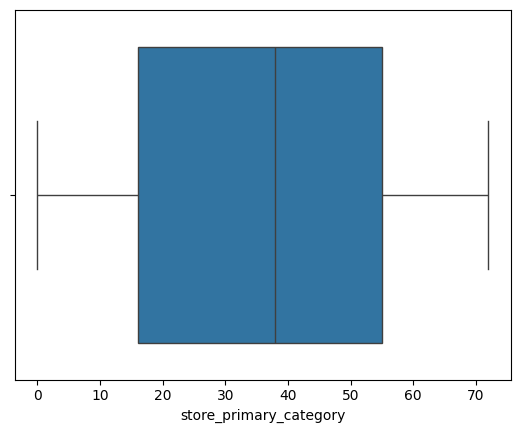

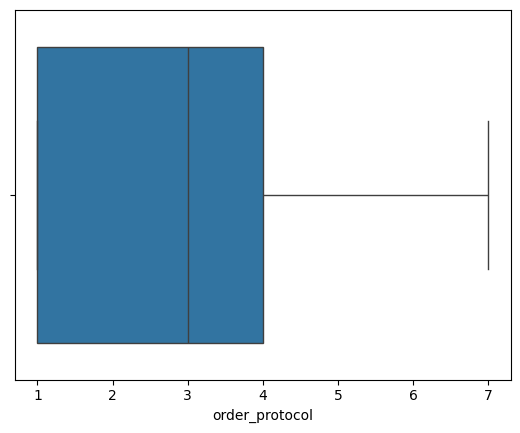

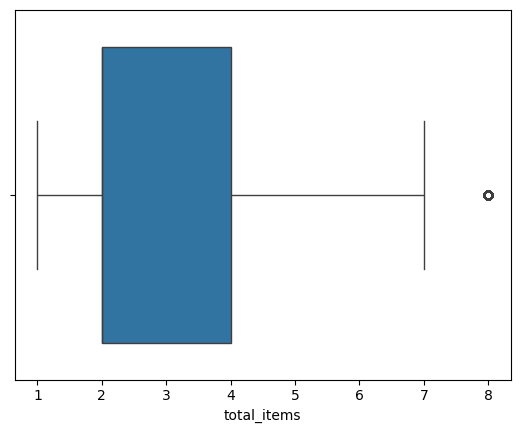

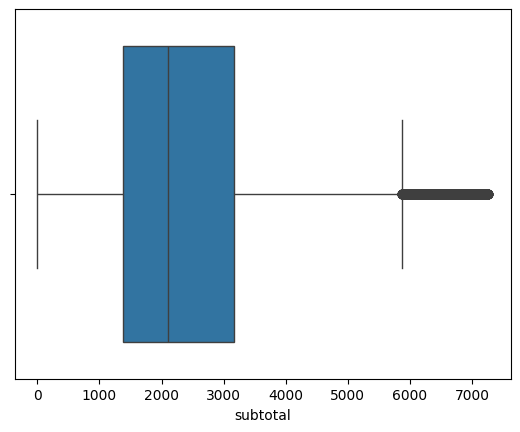

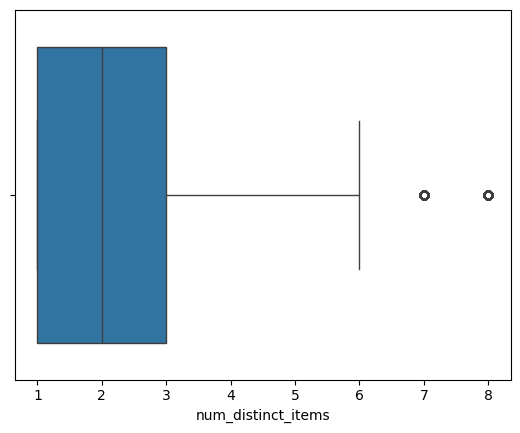

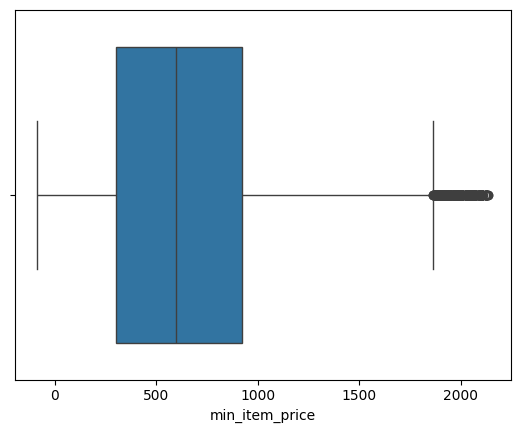

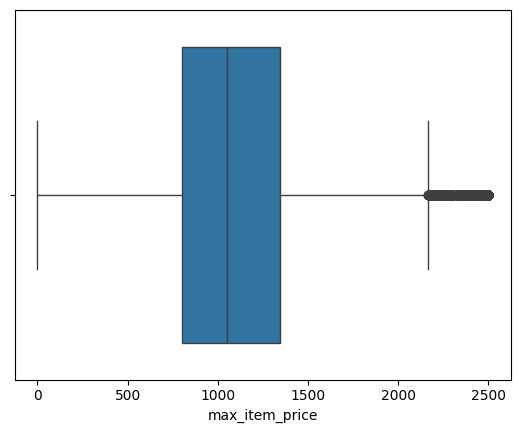

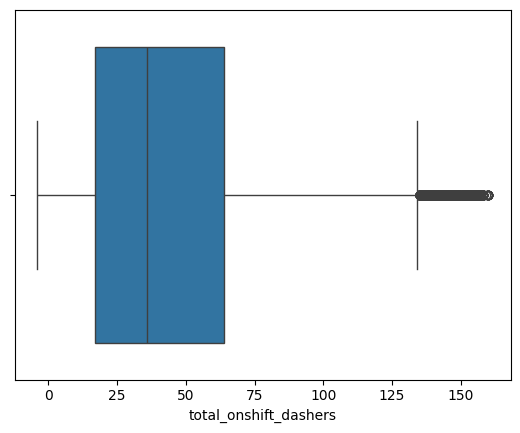

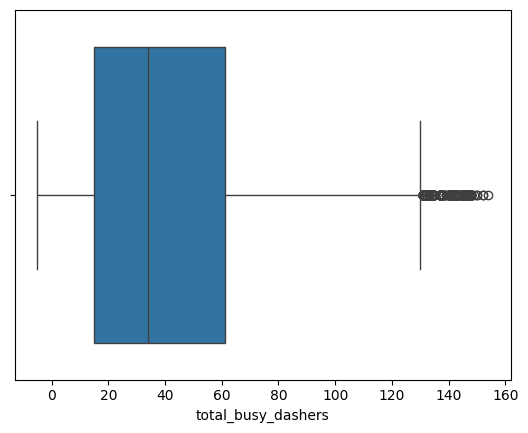

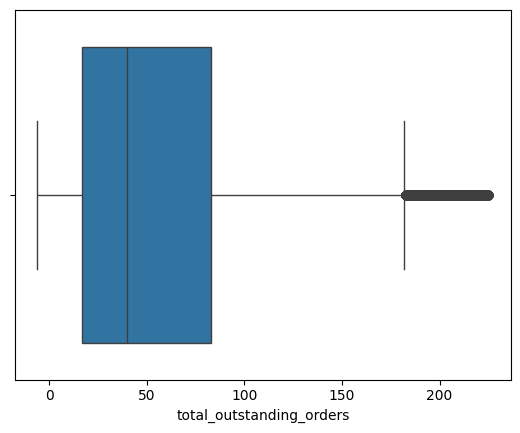

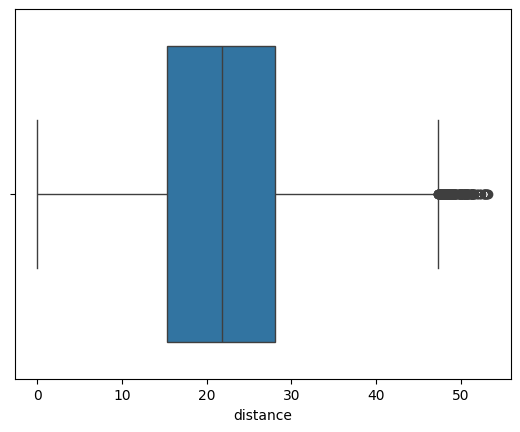

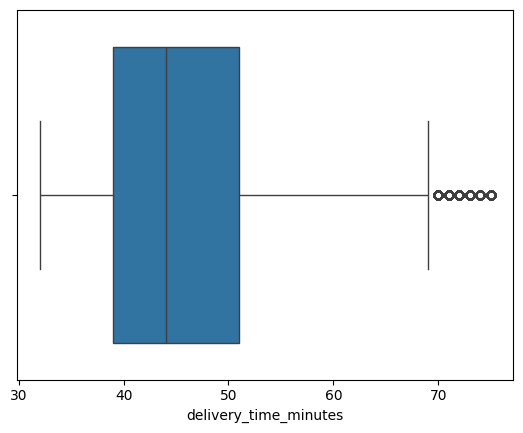

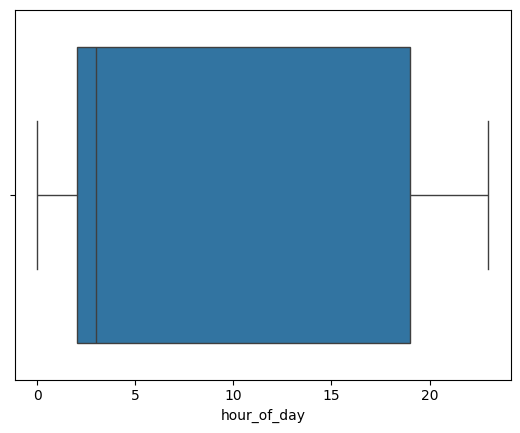

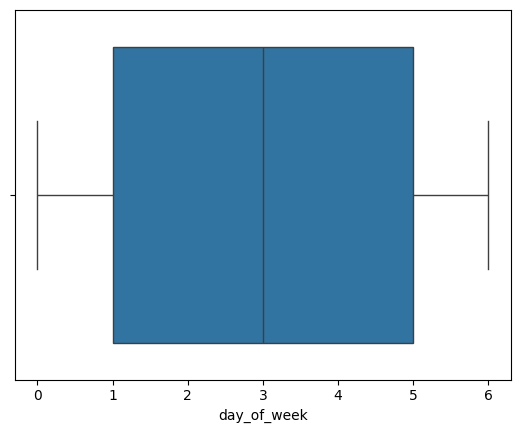

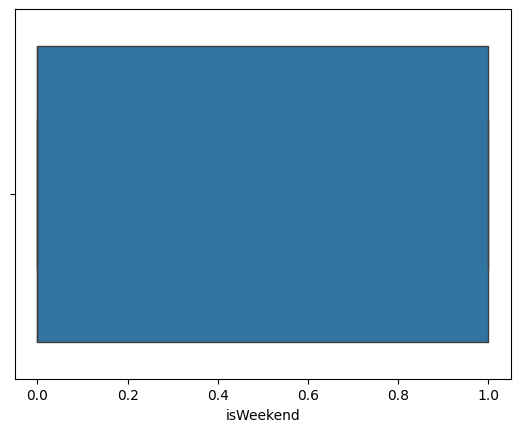

In [ ]:
for i in['store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time_minutes',
       'hour_of_day', 'day_of_week', 'isWeekend']:
       sns.boxplot(data=df,x=i)
       plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols]



total_items  subtotal  num_distinct_items  min_item_price  \
0          0.428571  0.473706            0.428571        0.289249   
1          0.000000  0.261564            0.000000        0.668466   
2          0.428571  0.656801            0.285714        0.407557   
3          0.000000  0.209939            0.000000        0.724696   
4          0.142857  0.498348            0.142857        0.679712   
...             ...       ...                 ...             ...   
175772     0.285714  0.191217            0.285714        0.193882   
175773     0.714286  0.414372            0.428571        0.220873   
175774     0.571429  0.252753            0.285714        0.173639   
175775     0.000000  0.161757            0.000000        0.279352   
175776     0.428571  0.358618            0.428571        0.229870   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
0               0.4956               0.225610            0.119497   
1               0.5600               0.030488            0.044025   
2               0.6416               0.073171            0.069182   
3               0.6100               0.054878            0.069182   
4               0.8780               0.054878            0.062893   
...                ...                    ...                 ...   
175772          0.2596               0.128049            0.138365   
175773          0.3300               0.097561            0.100629   
175774          0.1596               0.262195            0.289308   
175775          0.2140               0.067073            0.075472   
175776          0.3000               0.146341            0.157233   

        total_outstanding_orders  distance  delivery_time_minutes  \
0                       0.116883  0.646396               0.348837   
1                       0.034632  0.518018               0.279070   
2                       0.103896  0.216967               0.534884   
3                       0.060606  0.596847               0.627907   
4                       0.056277  0.153904               0.325581   
...                          ...       ...                    ...   
175772                  0.125541  0.248498               0.255814   
175773                  0.086580  0.686937               0.697674   
175774                  0.199134  0.596847               0.325581   
175775                  0.077922  0.288288               0.302326   
175776                  0.125541  0.100601               0.116279   

        hour_of_day  day_of_week  isWeekend  
0          0.956522     0.666667        0.0  
1          0.913043     0.166667        0.0  
2          0.000000     0.000000        0.0  
3          0.130435     0.500000        0.0  
4          0.086957     0.166667        0.0  
...             ...          ...        ...  
175772     0.000000     0.166667        0.0  
175773     0.000000     0.666667        0.0  
175774     0.173913     0.833333        1.0  
175775     0.782609     1.000000        1.0  
175776     0.826087     1.000000        1.0  

[160712 rows x 13 columns]

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression

# Initialize the regression model
model = LinearRegression()

print("Linear Regression model initialized.")

Linear Regression model initialized.


In [ ]:
# Train the model using the training data

# Example DataFrame
df = pd.DataFrame({'delivery_time_minutes': ['2025-05-03 12:30:00', '2025-05-03 14:00:00']})

# Convert to datetime
df['delivery_time_minutes'] = pd.to_datetime(df['delivery_time_minutes'])

# Convert to Unix time as float (seconds since epoch)
df['delivery_time_minutes'] = df['delivery_time_minutes'].astype('int64') / 1e9

print(df)

   delivery_time_minutes
0           1.746275e+09
1           1.746281e+09


In [ ]:


# Train the model using the training data

#Instead of creating a new df, using df_dropped which was created earlier and contains necessary columns.
x_train = df_dropped[['market_id','store_primary_category','order_protocol','total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']]

# Dropping 'delivery_time_minutes' if it exists (axis=1 specifies to drop columns)
if 'delivery_time_minutes' in x_train.columns:
    x_train = x_train.drop(columns=['delivery_time_minutes'], axis=1)

y = df_dropped['delivery_time_minutes']

# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_train, y, test_size=0.2, random_state=42)  # Changed x_train_test to x_test

# Initialize the model
model = LinearRegression()

# Train (fit) the model
model.fit(x_train, y_train)

print(" Model trained successfully!")

 Model trained successfully!


In [ ]:
# Make predictions
y_pred = model.predict(x_test)
y_pred


array([50.28959255, 66.24218086, 39.7186001 , ..., 31.1242942 ,
       38.9340157 , 41.96649988])

In [ ]:
# Find results for evaluation metrics
# Instead of using accuracy_score, use metrics appropriate for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 14.480124308998418
Root Mean Squared Error: 3.8052758518927927
Mean Absolute Error: 2.889152395191431
R-squared: 0.8345644508252126


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop over number of top features and test the data
for n_features in range(1, len(feature_names) + 1):
    top_features = feature_names[:n_features]

    # Prepare subset of data
    X_subset = X[top_features]



In [ ]:
print(f"Total number of features: {len(feature_names)}")


Total number of features: 95


In [ ]:
# Build the final model with selected number of features

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate the final model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model (95 features) - RMSE: {rmse:.4f}")
print(f"Final Model (95 features) - MAE: {mae:.4f}")
print(f"Final Model (95 features) - R-squared: {r2:.4f}")

Final Model (95 features) - RMSE: 1.9932
Final Model (95 features) - MAE: 1.4486
Final Model (95 features) - R-squared: 0.9546


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

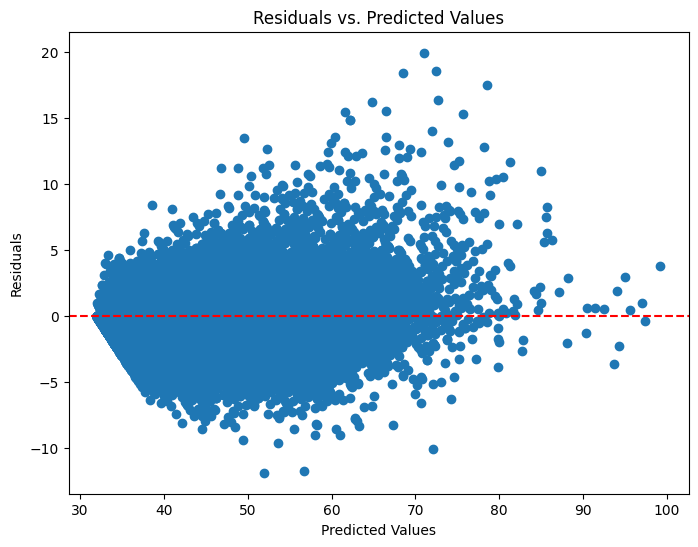

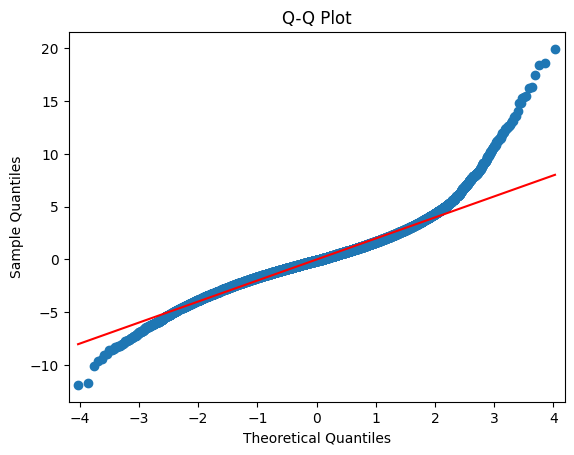

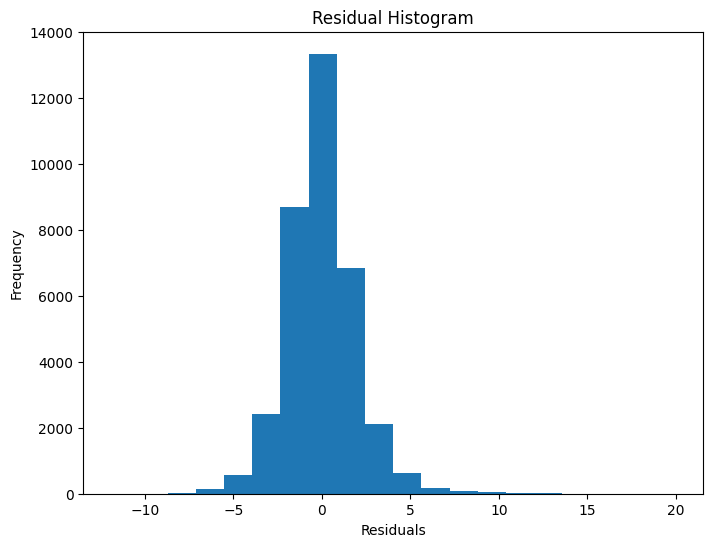

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Calculate residuals
residuals = y_test - y_pred

# 1. Residuals vs. Predicted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# 2. Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# 3. Residual Histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final mode

# Unscaled model
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
rmse_unscaled = np.sqrt(mean_squared_error(y_test, y_pred_unscaled))

#  Scaled model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))

# Compare
print(f"Unscaled RMSE: {rmse_unscaled:.4f}")
print(f"Scaled RMSE: {rmse_scaled:.4f}")


Unscaled RMSE: 2.9145
Scaled RMSE: 2.9145


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficient for 'total_items'
feature_names = X.columns
coef = model.coef_
total_items_index = list(feature_names).index('total_items')
effect = coef[total_items_index]

print(f"Effect of 1-unit increase in 'total_items': {effect:.4f} minutes on delivery time")


Effect of 1-unit increase in 'total_items': -0.0392 minutes on delivery time


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes,there are categorical variables in the dataset.

1.Market id: Delivery time varies notably across markets — Market 1 has the highest average delivery time, while Market 3 is the fastest . This suggests that location-related factors traffic, density, dasher availability influence delivery times.

2.Storage primary category:The type of store heavily impacts delivery time. Some store types like Category 3 take much longer, possibly due to preparation time or order complexity.

3.Order protocal: The order method matters. Certain protocols likely automated or streamlined ones result in faster delivery times, while others introduce delays, possibly due to manual handling or slower coordination.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size =0.2 refers to during the data into training and test sets.20% of the datase will be the test set and
80% of the dataset will be the trainig set



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Delivery time minutes is have the highest correlation.




---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
1.Visual inspection

2.Statistical Methods

3.Leverage and Influence Measures


I first checked if outliers were due to data errors and corrected or removed them if necessary. For valid extreme values, I either applied a transformation, capped them, or used robust models. I always compared the results with and without outliers to assess their impact before making a final decision



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**

1.total_outstanding_order

2.total_busy_dashers

3.distance



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>The linear regression algorithm is a statistical method used to model the relationship between one or more input variables and a continuous output variable . The goal is to find the best-fitting line that represents this relationship.

Steps of Linear Regression Algorithm Steps
Define the model:

1.Choose the cost function: Mean Squared Error (MSE)

2.Minimize the cost function using methods like Gradient Descent or Normal Equation.

3.Make predictions using the learned parameters.

4.Evaluate the model using metrics like MSE, RMSE, and R-squared




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**SIMPLE LINEAR REGRESSION**: Simple linear regression involves only one independent variable to predict the dependent variable. It is used to model the relationship between a single predictor and a response variable.

y=β
0
​
 +β
1
​
 x+c



**MULITIPLE LINEAR REGRESSION**:Multiple linear regression involves two or more independent variables to predict the dependent variable. It models the relationship between several predictors and a response variable.

y=β
0
​
 +β
1
​
 x
1
​
 +β
2
​
 x
2
​
 +⋯+β
p
​
 x
p
​
 +c



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>**COST FUNCTION**:The cost function IS also known as the loss function in linear regression plays a crucial role in measuring how well the model fits the data. It quantifies the difference between the predicted values from the model and the actual values from the data.

**MINIMIZING THE COST FUNCTION**:Minimizing the cost function involves adjusting the model parameters the slope and intercept  for simple linear regression so that the predictions become more accurate



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.





**Underfitting**:Underfitting will happens when a model is too simple to capture the underlying structure of the data.

Example:Using linear regression for a relationship that is clearly nonlinear

**Overfitting**:Overfitting happens when a model learns the training data too well, including its noise and random fluctuations, instead of just capturing the underlying pattern.

Example:A decision tree that perfectly classifies the training data by making very specific splits for every small variation, but fails on new data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plots are plays a main to evaluates the linear regression model like Checking the  linearity, checks for constant variance and check for independence.